In [1]:
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dataset.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [5]:
labels = df['Category']

In [6]:
labels.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

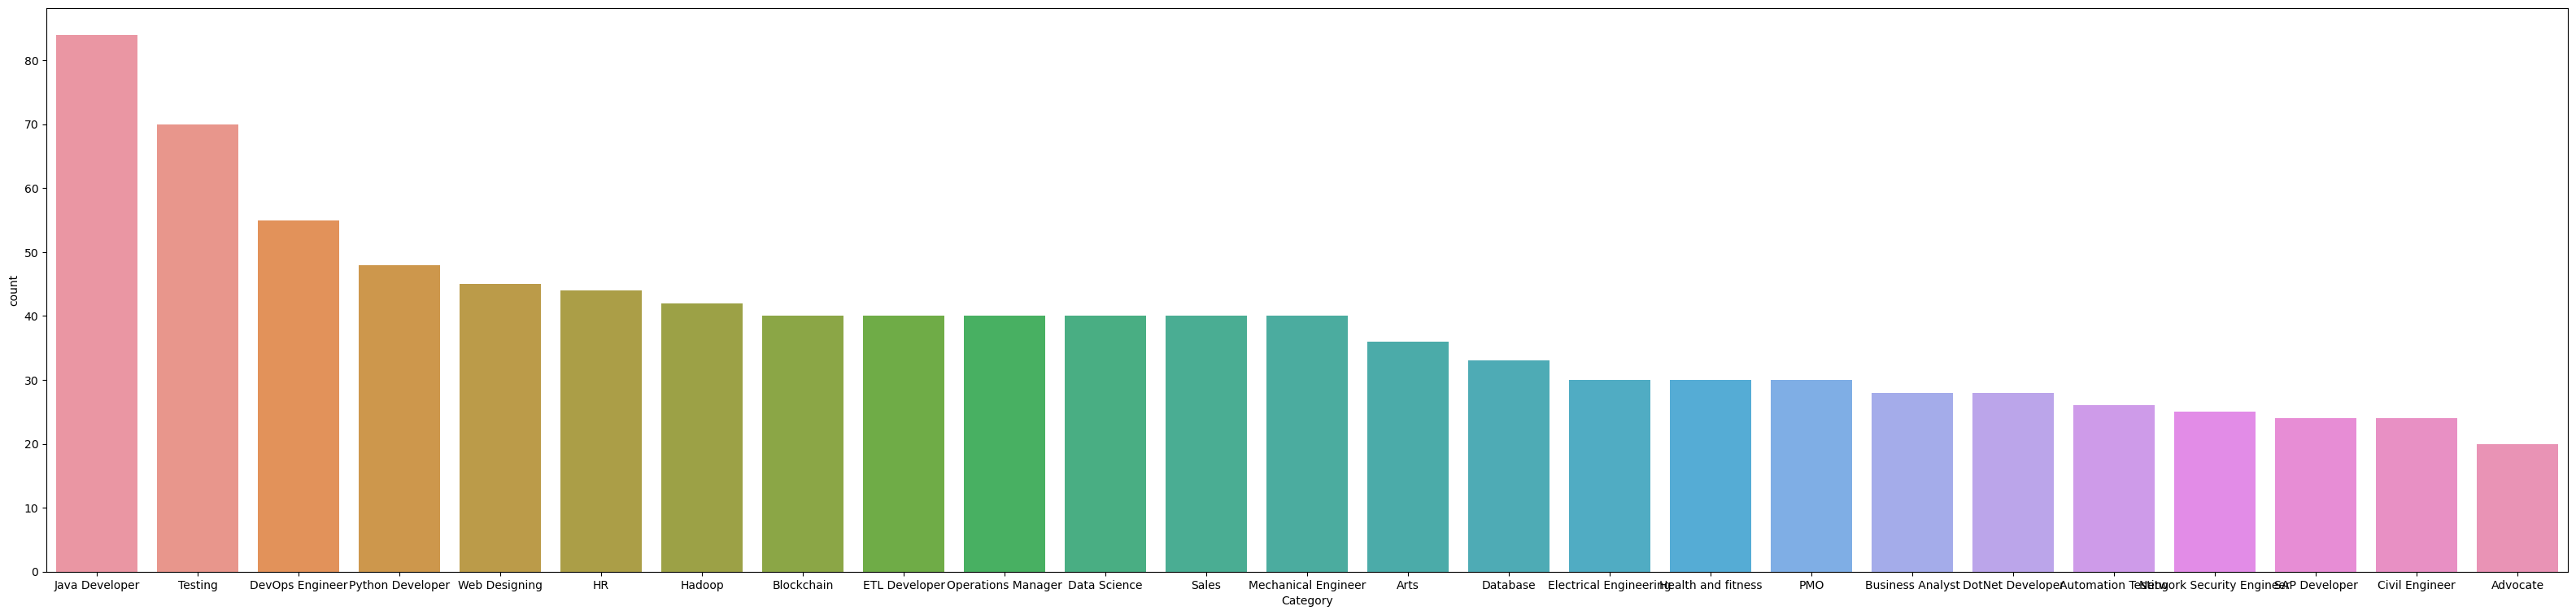

In [7]:
plt.figure(figsize=(40,9))
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)
plt.show()

In [8]:
#data cleaning for the resumes
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [9]:
df['cleaned_resume']=df['Resume'].apply(lambda x:clean_function(x))
df

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [10]:
inputs = df['cleaned_resume']
inputs

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object

In [11]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

In [12]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [13]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Srishti
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Srishti
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Srishti Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Srishti
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
vectorizer = CountVectorizer()

In [15]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [16]:
Xtrain

<721x7465 sparse matrix of type '<class 'numpy.int64'>'
	with 140450 stored elements in Compressed Sparse Row format>

In [17]:
Xtest

<241x7465 sparse matrix of type '<class 'numpy.int64'>'
	with 46252 stored elements in Compressed Sparse Row format>

In [18]:
(Xtrain != 0).sum()/np.prod(Xtrain.shape)

0.0260949618794318

In [19]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("Train score:",model.score(Xtrain,Ytrain))
print("Test score:",model.score(Xtest,Ytest))

Train score: 0.9986130374479889
Test score: 0.966804979253112


In [20]:
# with stopwords
vectorizer1 = CountVectorizer(stop_words='english')
Xtrain1 = vectorizer1.fit_transform(inputs_train)
Xtest1 = vectorizer1.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain1, Ytrain)
print("train score:", model.score(Xtrain1, Ytrain))
print("test score:", model.score(Xtest1, Ytest))

train score: 0.9986130374479889
test score: 0.966804979253112


In [21]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [22]:
#with stemming
vectorizer2 = CountVectorizer(tokenizer=StemTokenizer())
Xtrain2 = vectorizer2.fit_transform(inputs_train)
Xtest2 = vectorizer2.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain2, Ytrain)
print("train score:", model.score(Xtrain2, Ytrain))
print("test score:", model.score(Xtest2, Ytest))

train score: 0.9986130374479889
test score: 0.966804979253112


In [23]:
def simple_tokenizer(s):
  return s.split()

In [24]:
# string split tokenizer
vectorizer3 = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain3 = vectorizer3.fit_transform(inputs_train)
Xtest3 = vectorizer3.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain3, Ytrain)
print("train score:", model.score(Xtrain3, Ytrain))
print("test score:", model.score(Xtest3, Ytest))

train score: 0.9944521497919556
test score: 0.9626556016597511


In [25]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [26]:
vectorizer4 = CountVectorizer()
Xtrain4 = vectorizer4.fit_transform(inputs_train)
Xtest4 = vectorizer4.transform(inputs_test)
model = RFC(max_depth = 15)
model.fit(Xtrain4, Ytrain)
print("train score:", model.score(Xtrain4, Ytrain))
print("test score:", model.score(Xtest4, Ytest))

train score: 0.9930651872399445
test score: 0.966804979253112


In [27]:
#with Stemming
vectorizer5 = CountVectorizer(tokenizer=StemTokenizer())
Xtrain5 = vectorizer5.fit_transform(inputs_train)
Xtest5 = vectorizer5.transform(inputs_test)
model = RFC(max_depth=100)
model.fit(Xtrain5, Ytrain)
print("train score:", model.score(Xtrain5, Ytrain))
print("test score:", model.score(Xtest5, Ytest))
#cannot use this model due to overfitting

train score: 1.0
test score: 0.979253112033195


In [28]:
#final model
vectorizer4 = CountVectorizer(stop_words='english')
Xtrain4 = vectorizer4.fit_transform(inputs_train)
Xtest4 = vectorizer4.transform(inputs_test)
final_model = RFC(max_depth = 15)
final_model.fit(Xtrain4, Ytrain)
print("train score:", final_model.score(Xtrain4, Ytrain))
print("test score:",final_model.score(Xtest4, Ytest))

train score: 0.9986130374479889
test score: 0.966804979253112


In [29]:
labels.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [30]:
def new_input(resumes):
        cleaned_resumes = resumes.apply(lambda x:clean_function(x))
        transformed_resumes = vectorizer4.transform(cleaned_resumes)
        return transformed_resumes

In [31]:
#Here I have used the skills from my own resume in order to test the model.
x = """Machine Learning, Deep Learning, Natural Language Processing, Data Mining, Flask, Django, Probability and Statistics, Linear Algebra, Algorithms and Data Structures, Software Development, AWS Cloud Foundation 
"""
new_df = pd.Series(x)
new_df

0    Machine Learning, Deep Learning, Natural Langu...
dtype: object

In [32]:
pred = final_model.predict(new_input(new_df))
pred

array(['Data Science'], dtype=object)